In [ ]:
import torch

def target_function(x):
    return 2**x * torch.sin(2**-x)

In [ ]:
class RegressionNet(torch.nn.Module):
    # your code here
    def __init__(self, n_hidden_neurons):
        super(RegressionNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Tanh()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.act2 = torch.nn.Tanh()
        self.fc3 = torch.nn.Linear(n_hidden_neurons, 1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        return x

net = RegressionNet(20)

In [ ]:

# ------Dataset preparation start--------:
x_train =  torch.linspace(-10, 5, 100)
y_train = target_function(x_train)
noise = torch.randn(y_train.shape) / 20.
y_train = y_train + noise
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

x_validation = torch.linspace(-10, 5, 100)
y_validation = target_function(x_validation)
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)
# ------Dataset preparation end--------:

tensor([[-1.5482e-04],
        [-1.0732e-03],
        [ 7.0097e-04],
        [-5.7608e-04],
        [ 6.5311e-04],
        [ 9.8906e-04],
        [-1.7836e-03],
        [ 1.5283e-03],
        [ 1.8686e-03],
        [ 2.1850e-03],
        [ 3.1936e-04],
        [ 2.6806e-03],
        [ 3.3656e-03],
        [-2.4106e-03],
        [ 1.0479e-03],
        [-4.6642e-03],
        [ 3.9665e-03],
        [ 4.9868e-03],
        [-4.1533e-03],
        [ 6.0007e-03],
        [-2.5418e-03],
        [-2.2237e-03],
        [ 8.5996e-03],
        [-3.8417e-03],
        [ 7.4949e-03],
        [-1.2848e-02],
        [-1.0455e-02],
        [-6.5007e-03],
        [-1.1818e-02],
        [-2.0529e-02],
        [-2.9803e-03],
        [ 2.4775e-02],
        [-2.3459e-02],
        [ 1.7232e-02],
        [-1.7709e-02],
        [ 2.7786e-02],
        [-4.1880e-02],
        [ 3.9169e-02],
        [ 4.1222e-03],
        [-5.7028e-02],
        [ 2.3338e-02],
        [ 6.8612e-02],
        [-1.0514e-02],
        [-8

In [ ]:
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

def loss(pred, target):
    squares = (pred - target)**2
    return squares.mean()
    # your code here

In [ ]:
for epoch_index in range(2000):
    optimizer.zero_grad()

    y_pred = net.forward(x_train)# make forward
    loss_value = loss(y_pred, y_train)
    loss_value.backward()# make backward
    optimizer.step()# make step

In [ ]:
# Проверка осуществляется вызовом кода:
def metric(pred, target):
       return (pred - target).abs().mean()
#
print(metric(net.forward(x_validation), y_validation).item())

0.01994856633245945


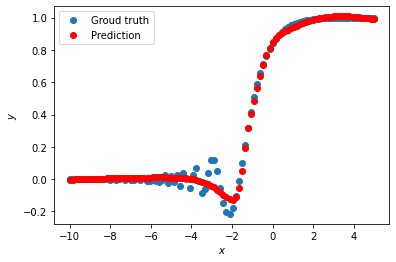

In [ ]:
import matplotlib.pyplot as plt
def predict(net, x, y):
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')


predict(net, x_validation, y_validation)
# (раскомментируйте, если решаете задание локально)